# Animated Movies Dataset Sentiment Analyzer

## Importing the data

In [70]:
#Importing libraries

import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [71]:
#Loading the dataset
df = pd.read_csv("Animated_Tv_Series.csv" , encoding = 'latin-1')

In [72]:
#Displaying the first 5 rows
df.head()

,Id,Title,Episodes,Year,Original channel,American company,Note,Technique,IMDb,Google users
0,1,2 Stupid Dogs,26.0,1993-1995,TBS,Hanna-Barbera,NaN,Traditional,7.2,91%
1,2,3-2-1 Penguins!,27.0,2000-2008,Direct to video,Big Idea Productions,NaN,CGI,6.5,91%
2,3,3-South,13.0,2002-2003,MTV,Warner Bros. AnimationMTV Animation,NaN,Traditional,8.0,87%
3,4,3Below: Tales of Arcadia,28.0,2018-2019,Netflix,DreamWorks Animation Television,NaN,CGI,7.6,77%
4,5,3rd & Bird,51.0,2008-2010,Playhouse Disney,Little Airplane Productions,British co-production,Flash,7.8,92%


##EDA

In [73]:
df.shape

(1816, 10)

### Checking for duplicates

In [74]:
# Check for duplicates
duplicate_rows = df[df.duplicated()]

# Print the number of duplicate rows
print(f"Number of duplicate rows: {len(duplicate_rows)}")

# Drop the duplicate rows
df.drop_duplicates(inplace=True)

# Print the shape of the DataFrame after removing duplicates
print(f"Shape of DataFrame after removing duplicates: {df.shape}")

Number of duplicate rows: 0
Shape of DataFrame after removing duplicates: (1816, 10)


###Converting the datatypes

In [75]:
# Remove the '%' sign from the 'Google users' column and convert it to float data type
df['Google users'] = df['Google users'].str.rstrip('%').astype('float')

##Treating Missing Values

In [76]:
# Check for missing values in each column of the DataFrame
df.isna().sum()

Id                     0
Title                  0
Episodes              18
Year                   0
Original channel       7
American company      45
Note                1328
Technique              0
IMDb                   4
Google users           4
dtype: int64

In [77]:
# Drop the 'Note' column from the DataFrame
df = df.drop(columns=['Note'])

# Drop rows with any missing values from the DataFrame
df = df.dropna()

### Univariate Analysis

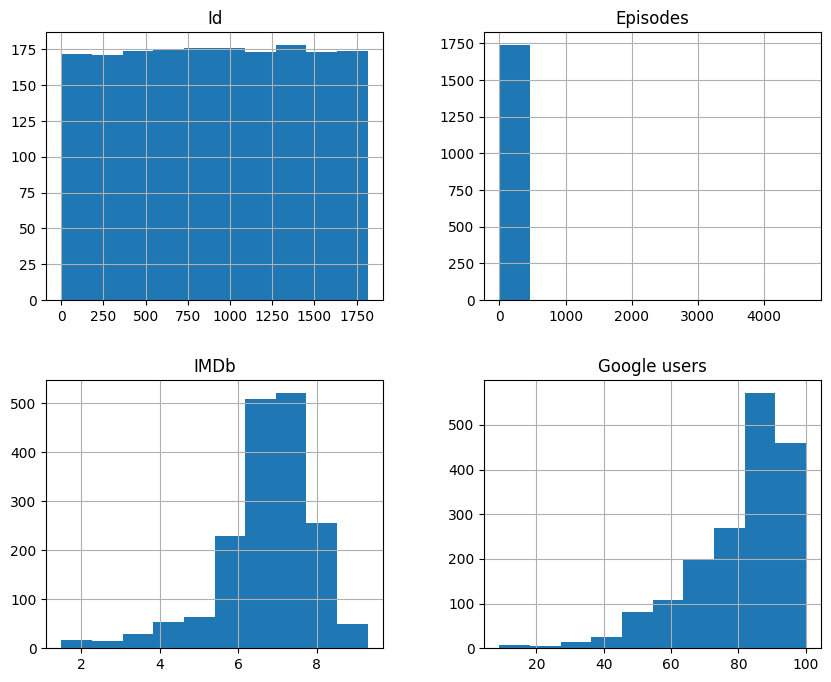

In [78]:
import matplotlib.pyplot as plt

# Plot histograms for all columns in the DataFrame
df.hist(figsize=(10, 8), bins=10)
plt.show()

In [79]:
print(df["Episodes"].value_counts())
print("Max amount of episodes is: ", df["Episodes"].max())

26.0     192
13.0     185
52.0     120
20.0      73
10.0      62
        ... 
245.0      1
108.0      1
352.0      1
174.0      1
105.0      1
Name: Episodes, Length: 173, dtype: int64
Max amount of episodes is:  4633.0


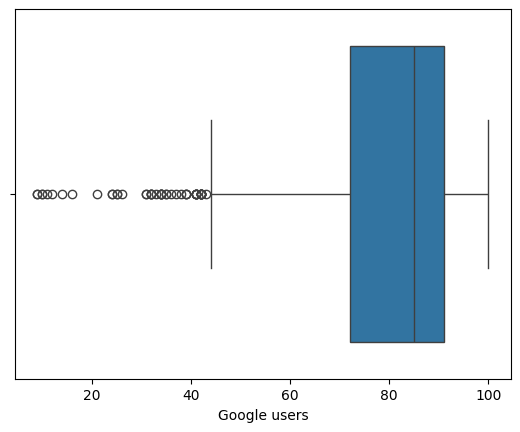

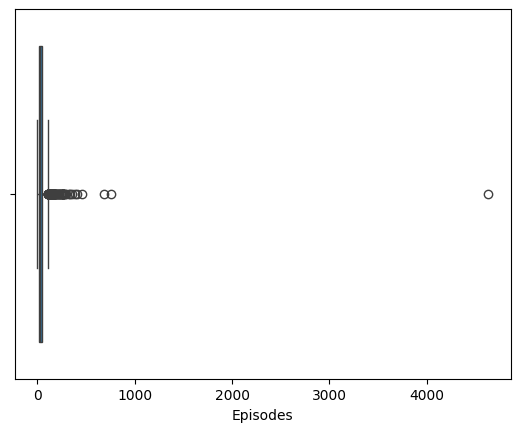

In [80]:


import matplotlib.pyplot as plt
# Create a boxplot for the "Google users" column
sns.boxplot(x=df["Google users"])
plt.show()

# Create a boxplot for the "Episodes" column
sns.boxplot(x=df["Episodes"])
plt.show()


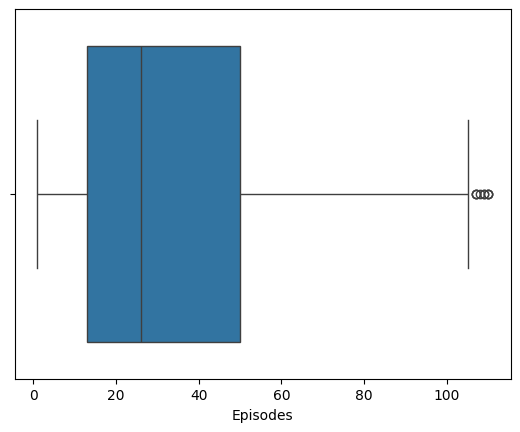

In [81]:
# prompt: delete the extreme outlier for episodes

Q1 = df['Episodes'].quantile(0.25)
Q3 = df['Episodes'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
df = df[df['Episodes'] <= upper_bound]

# Create a boxplot for the "Episodes" column
sns.boxplot(x=df["Episodes"])
plt.show()


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1628 entries, 0 to 1815
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1628 non-null   int64  
 1   Title             1628 non-null   object 
 2   Episodes          1628 non-null   float64
 3   Year              1628 non-null   object 
 4   Original channel  1628 non-null   object 
 5   American company  1628 non-null   object 
 6   Technique         1628 non-null   object 
 7   IMDb              1628 non-null   float64
 8   Google users      1628 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 127.2+ KB


### Most Used word in title


In [83]:
titles=df["Title"].values

text=' '.join(titles)

In [84]:
#Creating the tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

#Tokenizing the text
tokens = tokenizer.tokenize(text)

In [85]:
words = []

# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())

In [86]:
# Download the stopwords corpus from nltk
import nltk
nltk.download('stopwords')

# Get the list of stopwords for the English language
stopwords = nltk.corpus.stopwords.words('english')

# Initialize an empty list to store words excluding stopwords
words_new = []

# Iterate through each word in the list 'words'
for word in words:
    # Check if the word is not in the list of stopwords
    if word not in stopwords:
        # Append the word to the list 'words_new'
        words_new.append(word)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


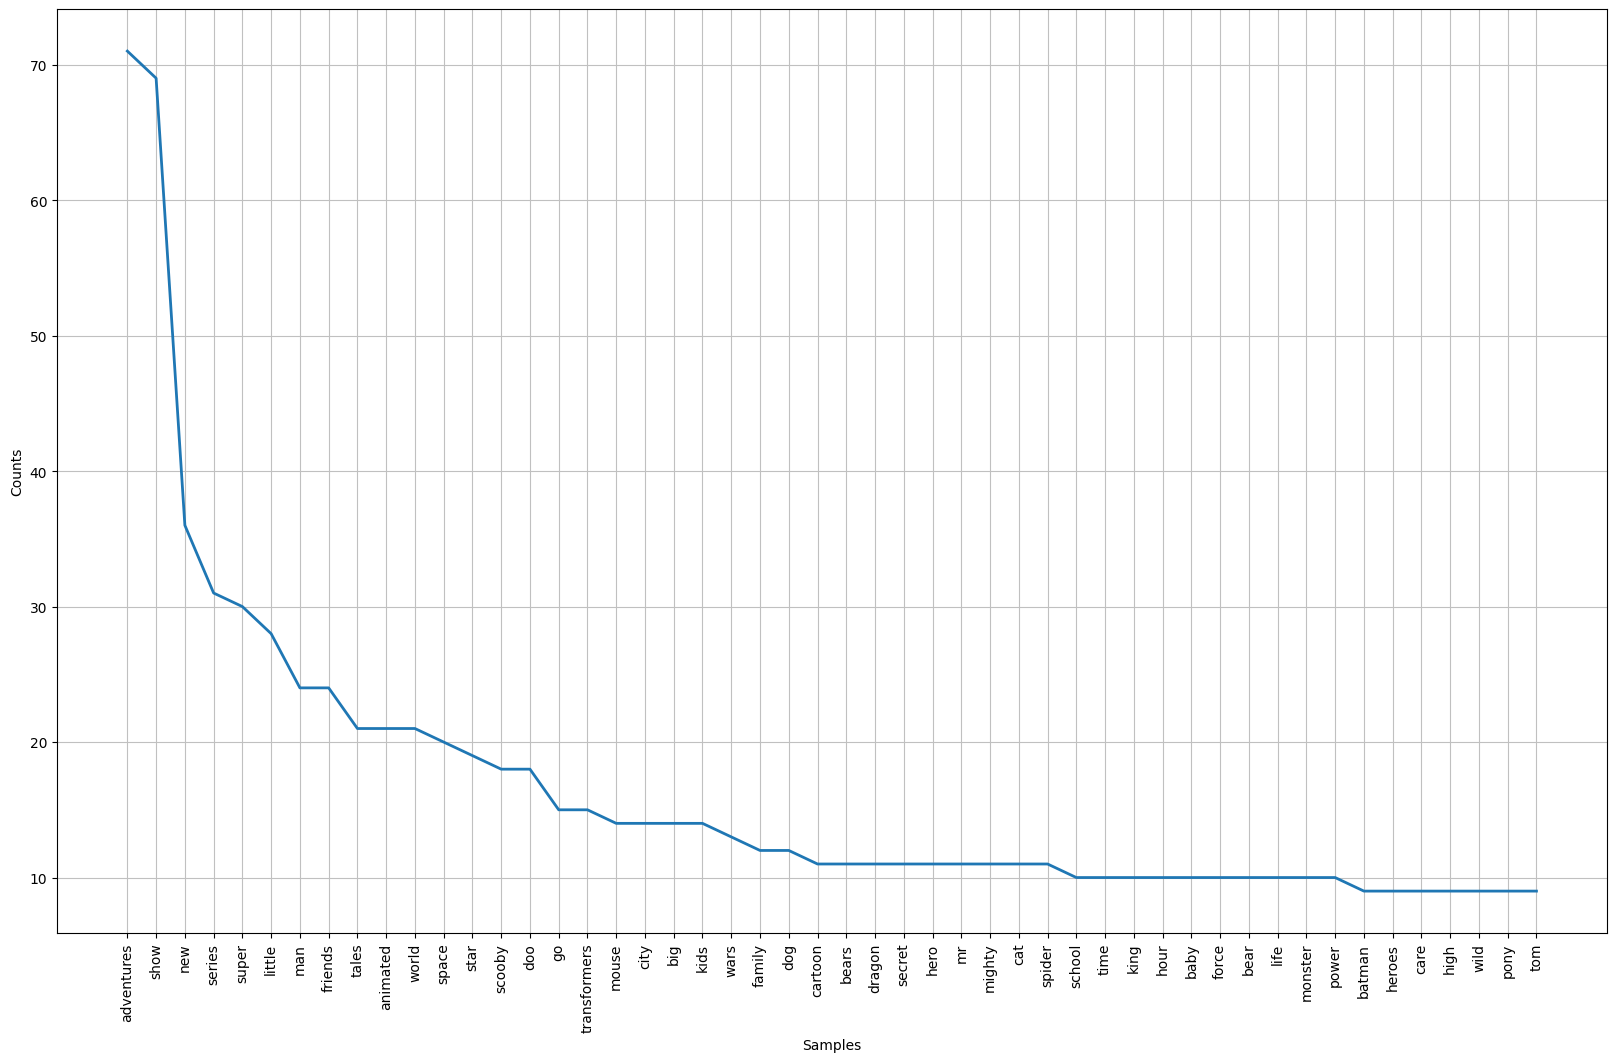

<Axes: xlabel='Samples', ylabel='Counts'>

In [87]:
# Calculate the frequency distribution of words in the list 'words_new'
freq_dist = nltk.FreqDist(words_new)

# Plot the top 50 most common words
plt.subplots(figsize=(20,12))
freq_dist.plot(50)


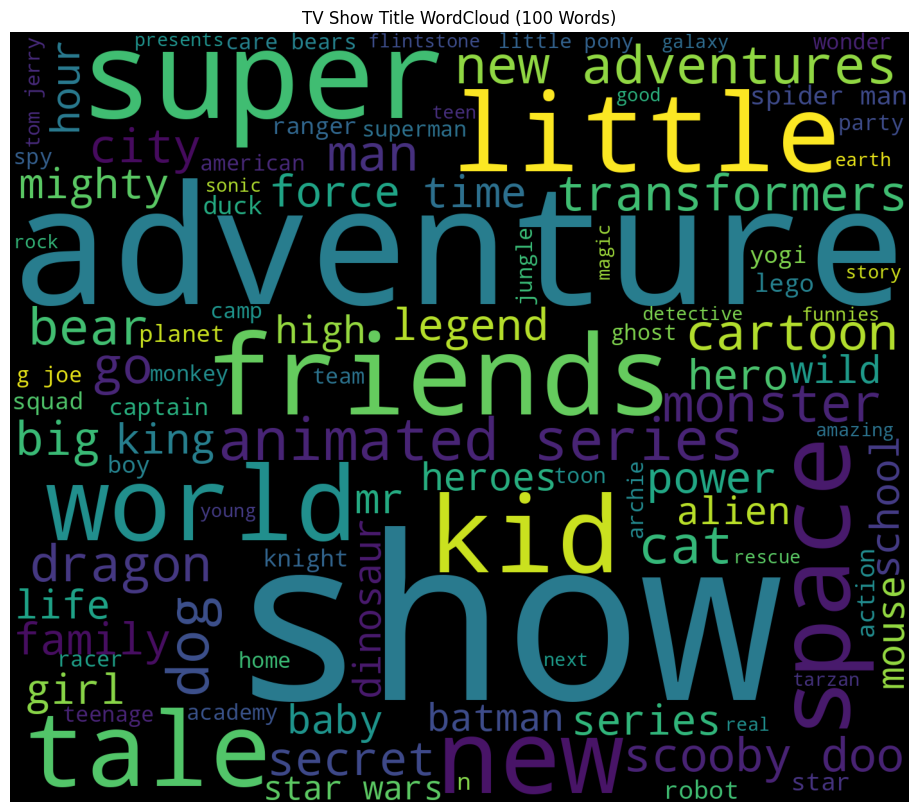

In [88]:
# Joining the words from the list 'words_new' excluding digits
res=' '.join([i for i in words_new if not i.isdigit()])

# Word cloud visualization
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res)

# Displaying the word cloud
plt.imshow(wordcloud)
plt.title('TV Show Title WordCloud (100 Words)')
plt.axis('off')  # Remove axes
plt.show()


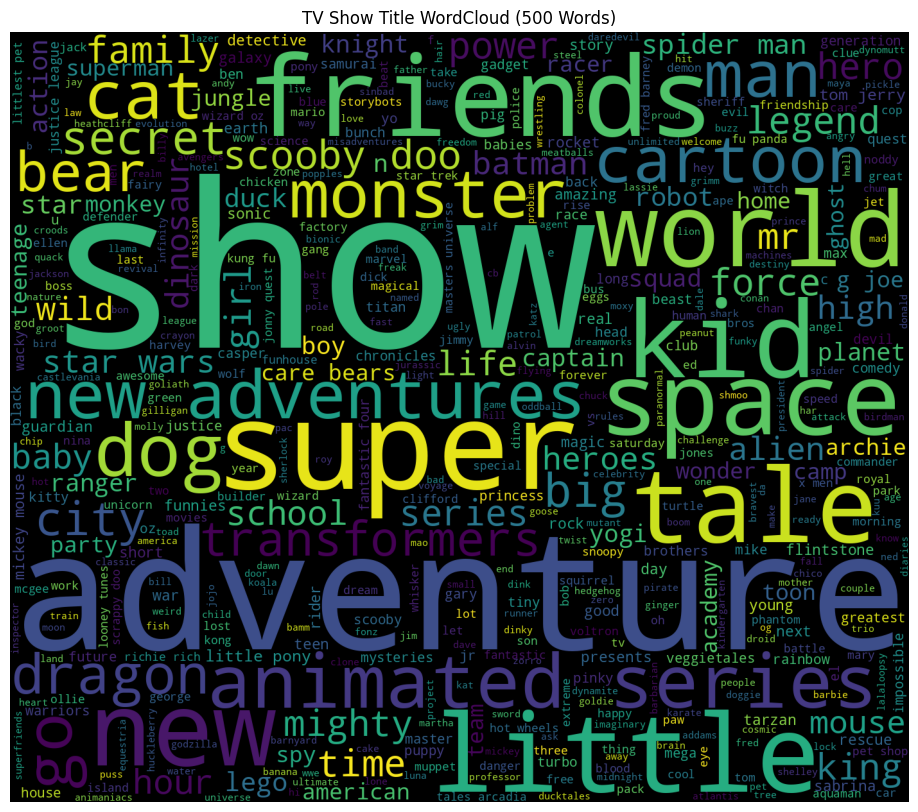

In [89]:
# Displaying the word cloud for TV show titles
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          max_words=500,
                          width=1400,
                          height=1200
                         ).generate(res)

plt.imshow(wordcloud)
plt.title('TV Show Title WordCloud (500 Words)')
plt.axis('off')
plt.show()

## Bivariate Analysis

###IMDB Ratings

In [90]:
# Printing TV shows with the highest IMDb ratings
print("TV Shows with highest IMDb ratings are= ")
print((df.sort_values("IMDb",ascending=False).head(20))['Title'])


TV Shows with highest IMDb ratings are= 
92              Avatar: The Last Airbender
1139    Office Ladies: The Animated Series
1284                        Rick and Morty
139            Batman: The Animated Series
117                                 Arcane
1149           Open Season: Call of Nature
508                     Face's Music Party
1501                             Saving Me
641                          Gravity Falls
23         Adventure Time: Fionna and Cake
240                       Blue Eye Samurai
1063                       Molly of Denali
1482                 StoryBots Super Songs
748                              Iconicles
197           The Bremen Avenue Experience
180                        BoJack Horseman
1156                  Over the Garden Wall
1019      The Most Popular Girls in School
312                         Classical Baby
998            The Misfortune of Being Ned
Name: Title, dtype: object


<Axes: xlabel='IMDb', ylabel='Title'>

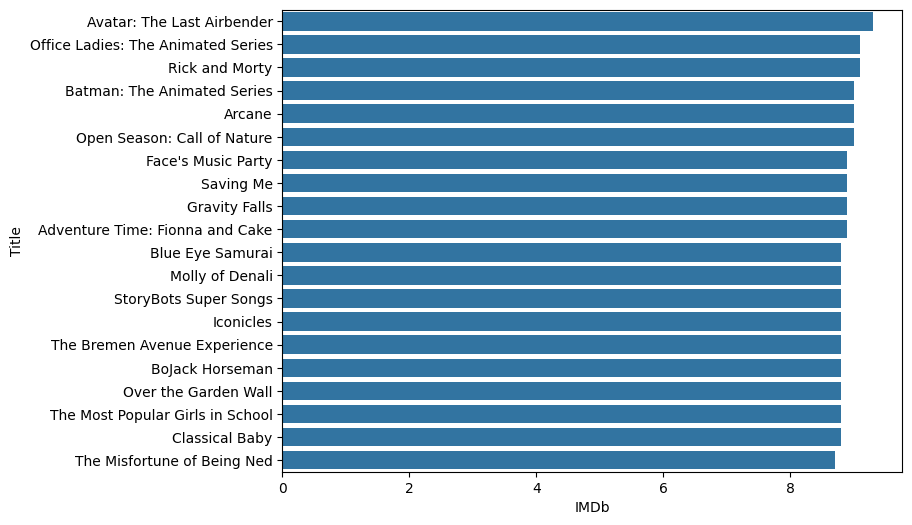

In [91]:
#barplot of rating
plt.subplots(figsize=(8,6))
sns.barplot(x="IMDb", y="Title" , data= df.sort_values("IMDb",ascending=False).head(20))

In [92]:
# Printing TV shows with the lowest IMDb ratings
print("TV Shows with lowest IMDb ratings are= ")
print((df.sort_values("IMDb",ascending=True).head(20))['Title'])


TV Shows with lowest IMDb ratings are= 
698                                 High Guardian Spice
511                                            Fairview
1690                                              Velma
34                  The Adventures of Paddy the Pelican
1438                                         Santa Inc.
200                 Britannica's Tales Around the World
697     The High Fructose Adventures of Annoying Orange
902                                        Little Ellen
943              Magical Girl Friendship Squad: Origins
244                                      Bounty Hunters
1218                                The Problem Solverz
332                                      The Crayon Box
1746                                      Wild Grinders
1289                                       Ridley Jones
1577                                   ThunderCats Roar
966                                     Megamind Rules!
1131                                       The Nutshack
1153    

<Axes: xlabel='IMDb', ylabel='Title'>

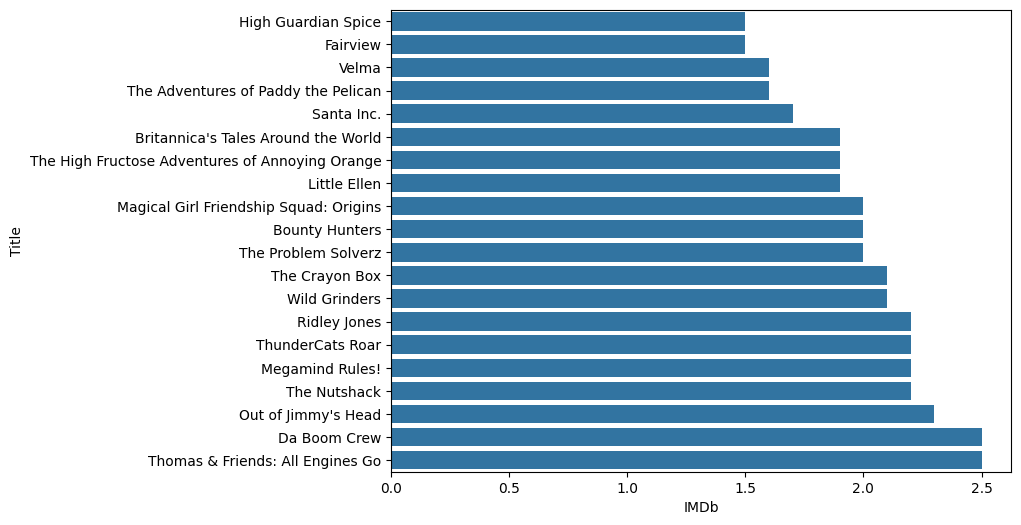

In [93]:
#barplot of rating
plt.subplots(figsize=(8,6))
sns.barplot(x="IMDb", y="Title" , data= df.sort_values("IMDb",ascending=True).head(20))

Text(0.5, 1.0, 'IMDb Rating Distribution')

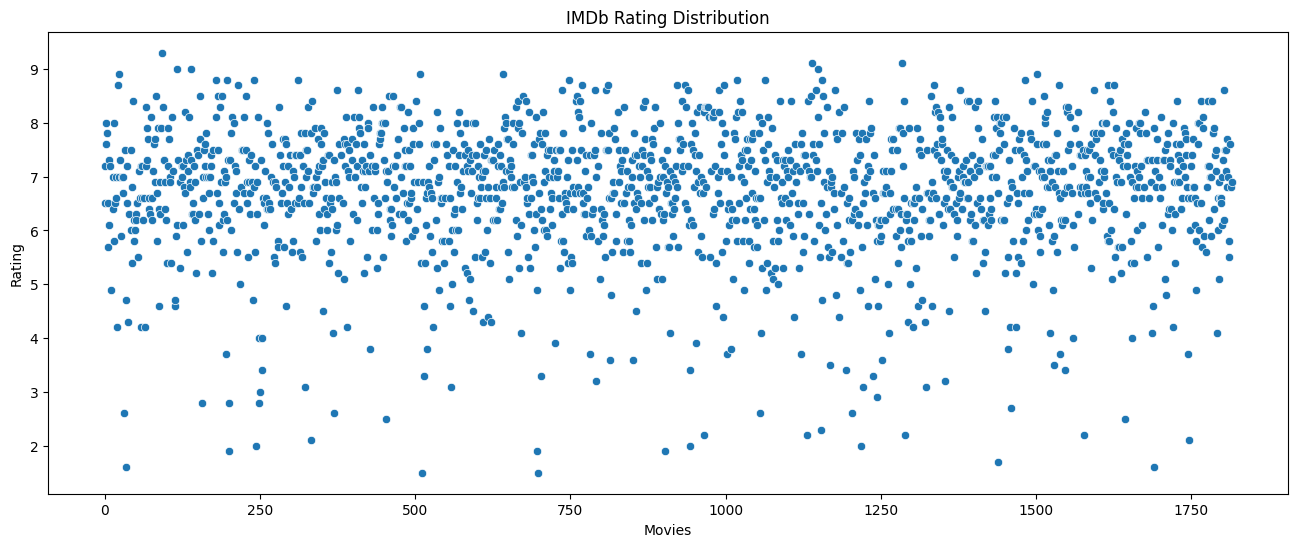

In [94]:
# Plotting the distribution of IMDb ratings for movies
plt.figure(figsize=(16, 6))
sns.scatterplot(data=df['IMDb'])
plt.ylabel("Rating")
plt.xlabel('Movies')
plt.title("IMDb Rating Distribution")


### Google User Data

In [95]:
# Printing the top 20 TV shows with the highest Google users scores
print("TV Shows with highest Google users scores are= ")
print((df.sort_values("Google users", ascending=False).head(20))['Title'])


TV Shows with highest Google users scores are= 
1768          The Wonderful Stories of Professor Kitzel
495                                      Epithet Erased
994                                  Mina and the Count
189                                          Braingames
1002                                          Misterjaw
227                     Bee and PuppyCat: Lazy in Space
432                                            Downtown
1023                                  The Mouse Factory
999                                        Mission Hill
722                                   Human Discoveries
598                                         Gary & Mike
1695          Visionaries: Knights of the Magical Light
1312    Roswell Conspiracies: Aliens, Myths and Legends
683                                        Helluva Boss
1628                                         Tutenstein
723                                       Human Kind Of
292                                          Centurions


<Axes: xlabel='Google users', ylabel='Title'>

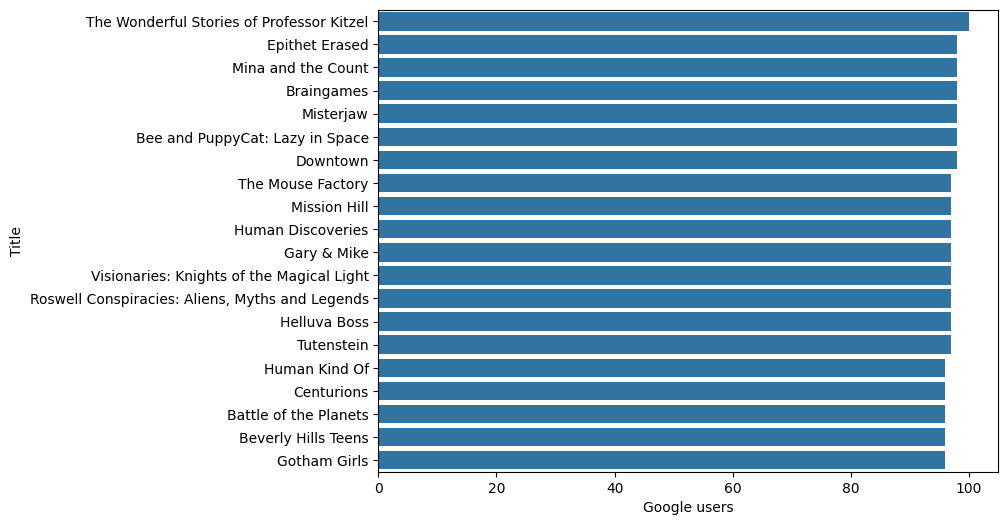

In [96]:
#barplot of rating
plt.subplots(figsize=(8,6))
sns.barplot(x="Google users", y="Title" , data= df.sort_values("Google users",ascending=False).head(20))

<Axes: xlabel='Google users', ylabel='Title'>

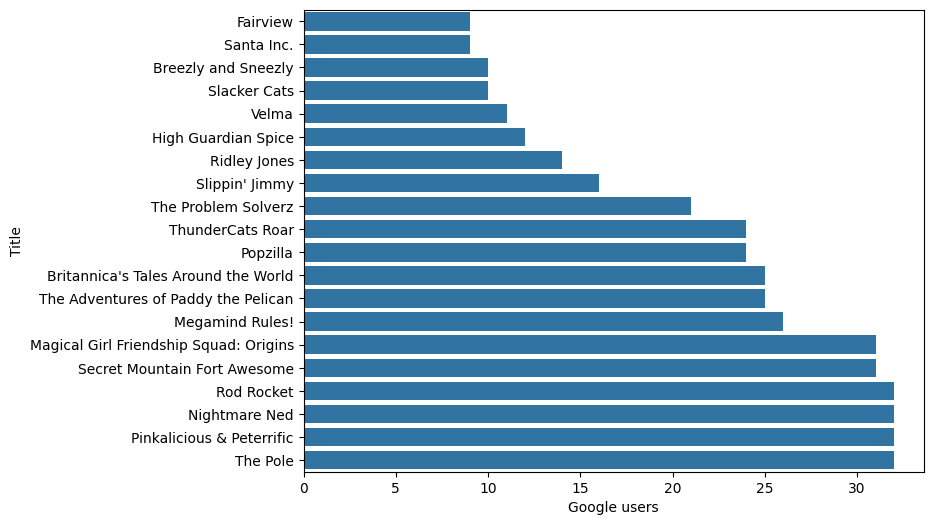

In [97]:
#barplot of rating
plt.subplots(figsize=(8,6))
sns.barplot(x="Google users", y="Title" , data= df.sort_values("Google users",ascending=True).head(20))

Text(0.5, 1.0, 'Google users Score Distribution')

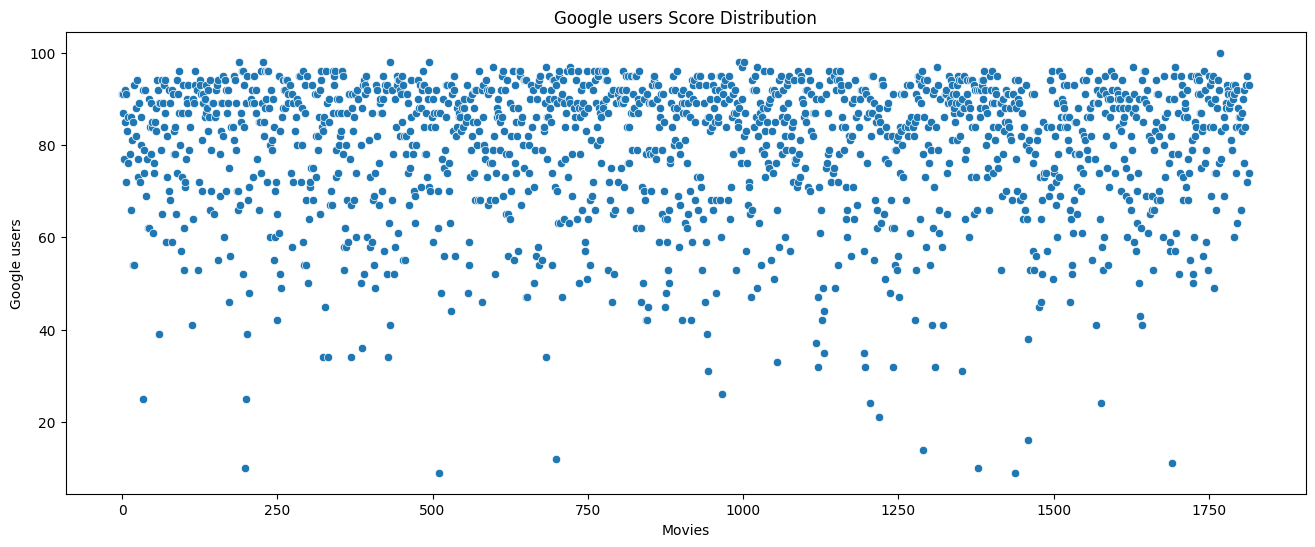

In [98]:
# Plotting the distribution of Google users scores for movies
plt.figure(figsize=(16, 6))
sns.scatterplot(data=df['Google users'])
plt.ylabel("Google users")
plt.xlabel('Movies')
plt.title("Google users Score Distribution")

### Multivariate Analysis

In [99]:
# Extracting relevant columns (Title, IMDb rating, Google users) from the DataFrame
ratings = df[["Title", 'IMDb', "Google users"]]
ratings.head()

,Title,IMDb,Google users
0,2 Stupid Dogs,7.2,91.0
1,3-2-1 Penguins!,6.5,91.0
2,3-South,8.0,87.0
3,3Below: Tales of Arcadia,7.6,77.0
4,3rd & Bird,7.8,92.0


In [100]:
# Multiply the IMDb ratings by 10 to standardize the scale
ratings["IMDb"] = ratings["IMDb"] * 10


<ipython-input-100-a473d3414c76>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings["IMDb"] = ratings["IMDb"] * 10


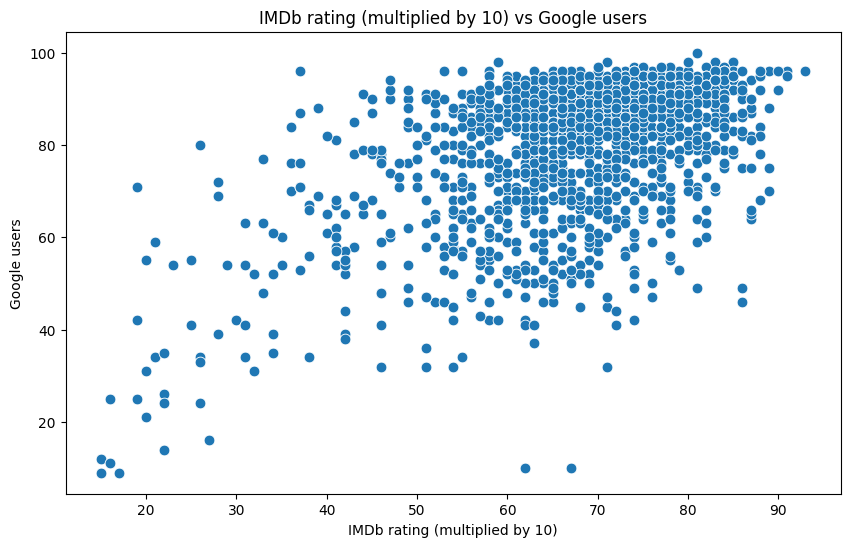

In [101]:
X=ratings[["IMDb","Google users"]]

#Scatterplot of the input data

plt.figure(figsize=(10,6))
sns.scatterplot(x = 'IMDb',y = 'Google users',  data = X  ,s = 60 )
plt.xlabel('IMDb rating (multiplied by 10)')
plt.ylabel('Google users')
plt.title('IMDb rating (multiplied by 10) vs Google users')
plt.show()

## Model

In [102]:
from sklearn.cluster import KMeans

# List to store the within-cluster sum of squares (WCSS) for different values of K
wcss = []

# Iterate over different values of K from 1 to 10
for i in range(1, 11):
    # Initialize KMeans clustering with i clusters
    km = KMeans(n_clusters=i)
    # Fit the model to the data
    km.fit(X)
    # Append the WCSS to the list
    wcss.append(km.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

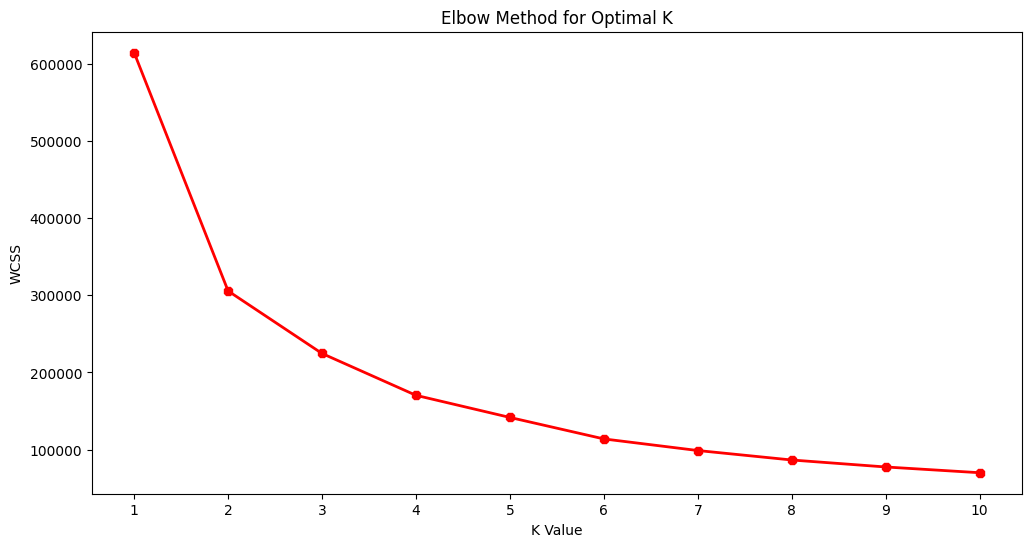

In [103]:
plt.figure(figsize=(12, 6))

# Plot the within-cluster sum of squares (WCSS) for different values of K
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")

plt.xlabel("K Value")
plt.xticks(np.arange(1, 11, 1))
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()


In [104]:
# Taking 4 clusters
km = KMeans(n_clusters=4)
km.fit(X)
y = km.predict(X)

# Add cluster labels to the dataframe
ratings["label"] = y
ratings.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-104-b887a1c0d4d7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings["label"] = y


,Title,IMDb,Google users,label
0,2 Stupid Dogs,72.0,91.0,0
1,3-2-1 Penguins!,65.0,91.0,2
2,3-South,80.0,87.0,0
3,3Below: Tales of Arcadia,76.0,77.0,0
4,3rd & Bird,78.0,92.0,0


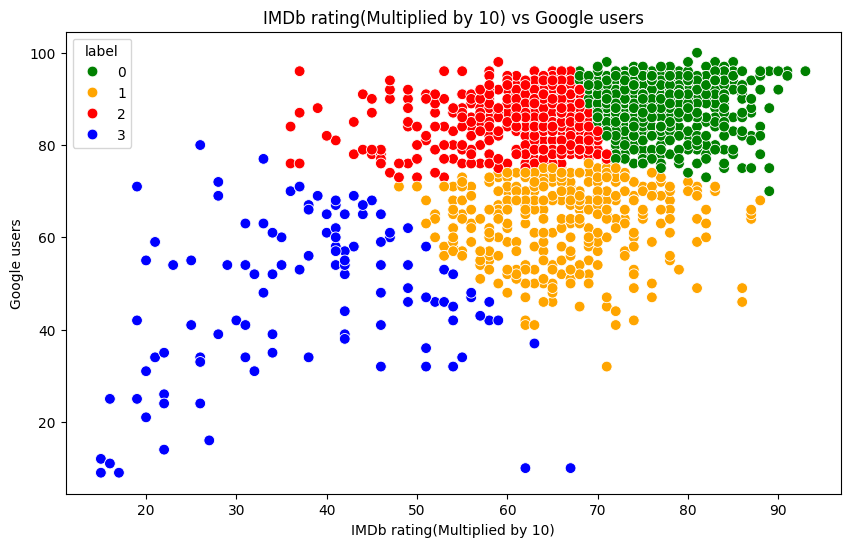

In [105]:
# Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='IMDb', y='Google users', hue="label",
                palette=['green', 'orange', 'red', "blue"], legend='full', data=ratings, s=60)

# Set labels for x and y axes
plt.xlabel('IMDb rating(Multiplied by 10)')
plt.ylabel('Google users')

# Set title of the plot
plt.title('IMDb rating(Multiplied by 10) vs Google users')

# Display the plot
plt.show()



- The cluster at the top are surely the best TV Shows, they have high scores by both IMDb and Rotten Tomatoes.
- The middle two are good and average TV Shows. There are outliers, and in some cases, some TV Shows have been rated high by one, but rated low by the other.
- The outliers are mainly caused by the fact that, say IMDb rated them well, but Rotten Tomatoes rated them badly.
- The bottom cluster is usually the TV Shows with bad ratings by both, but there are some outliers.

In [106]:
# Print the number of TV shows in Cluster 0
print('Number of Cluster 0 TV Shows are=')
print(len(ratings[ratings["label"]==0]))

# Print separator
print("--------------------------------------------")

# Print the number of TV shows in Cluster 1
print('Number of Cluster 1 TV Shows are=')
print(len(ratings[ratings["label"]==1]))

# Print separator
print("--------------------------------------------")

# Print the number of TV shows in Cluster 2
print('Number of Cluster 2 TV Shows are=')
print(len(ratings[ratings["label"]==2]))

# Print separator
print("--------------------------------------------")

# Print the number of TV shows in Cluster 3
print('Number of Cluster 3 TV Shows are=')
print(len(ratings[ratings["label"]==3]))

# Print separator
print("--------------------------------------------")

Number of Cluster 0 TV Shows are=
636
--------------------------------------------
Number of Cluster 1 TV Shows are=
384
--------------------------------------------
Number of Cluster 2 TV Shows are=
493
--------------------------------------------
Number of Cluster 3 TV Shows are=
115
--------------------------------------------


In [107]:
# Print header indicating the content being displayed
print('TV Shows in cluster 0')

# Extract and print the titles of TV shows belonging to cluster 0
print(ratings[ratings["label"]==0]["Title"].values)


TV Shows in cluster 0
['2 Stupid Dogs' '3-South' '3Below: Tales of Arcadia' '3rd & Bird'
 'The 13 Ghosts of Scooby-Doo' 'Aaahh!!! Real Monsters'
 'Action League Now!' 'The Addams Family (1992)'
 'Adventure Time: Distant Lands' 'Adventure Time: Fionna and Cake'
 'Adventures from the Book of Virtues' 'The Adventures of Batman'
 'The Adventures of Gulliver' 'The Adventures of OG Sherlock Kush'
 'The Adventures of Raggedy Ann and Andy' 'Adventures of the Gummi Bears'
 'Alabama Jackson' 'All Hail King Julien' 'The All-New Super Friends Hour'
 'The Alvin Show' 'Amphibia' 'The Angry Beavers' 'Animals'
 'Animaniacs (1993)' 'Animaniacs (2020)' 'Aquadonk Side Pieces'
 'Arabian Knights' 'The Archie Show' "Archie's TV Funnies"
 'Ask the StoryBots' 'The Astronut Show'
 'The Atom Ant/Secret Squirrel Show' 'Auto-B-Good'
 'Avatar: The Last Airbender' "The Avengers: Earth's Mightiest Heroes"
 'The Adventures of Napkin Man!'
 'The Adventures of Sam & Max: Freelance Police'
 'The Adventures of Super Mari